<center><font size="+4">Generating function analysis of the diffusion approximation to the birth-immigration-death process</font></center>

# Updated solution check for the diffusion approximation

## Check the solution to the characteristic equation.

In [1]:
chartu: logcontract(integrate(1/(-D * theta^2 + s * theta), theta));

                                      theta
                               log(-----------)
                                   D theta - s
(%o1)                          ----------------
                                      s

In [2]:
chartsolu: logcontract(chartu - subst(theta[0], theta, chartu));

                                (s - theta  D) theta
                                          0
                          log(- --------------------)
                                theta  (D theta - s)
                                     0
(%o2)                     ---------------------------
                                       s

In [3]:
chartsoltheta: solve([chartsolu=u], theta);

                                               s u
                                    theta  s %e
                                         0
(%o3)               [theta = -----------------------------]
                                        s u
                             theta  D %e    + s - theta  D
                                  0                    0

`\label{eq:diffapprox-theta-char}`

In [7]:
chartheta : s * theta[0] / (D * (1 - %e^(-s*u)) * theta[0] + s * %e^(-s * u));

                                   theta  s
                                        0
(%o7)                 ----------------------------------
                          - s u                   - s u
                      s %e      + theta  D (1 - %e     )
                                       0

In [8]:
solve(chartheta=theta,theta[0]);

                                         s theta
(%o8)             [theta  = - -----------------------------]
                        0                     s u
                              (D theta - s) %e    - D theta

In [9]:
subst(0, u, chartheta);

(%o9)                               theta
                                         0

In [10]:
chareqn(theta) := diff(theta, u) + D * theta^2 - s * theta;

                                                     2
(%o10)     chareqn(theta) := diff(theta, u) + D theta  + (- s) theta

In [11]:
chareqn(theta(u));

                   d                      2
(%o11)             -- (theta(u)) + D theta (u) - s theta(u)
                   du

In [12]:
factor(chareqn(chartheta));

(%o12)                                 0

## Check the solution for the cumulant generating function.

In [13]:
cgfsol :  s * %e^(s * tau) * theta/ (D* (%e^(s * tau) - 1) * theta+ s);

                                    s tau
                                s %e      theta
(%o13)                     -------------------------
                                s tau
                           D (%e      - 1) theta + s

In [14]:
gfeqn (gam) := diff(gam, tau) + theta * (D*theta - s) * diff(gam, theta);

(%o14) gfeqn(gam) := diff(gam, tau) + theta (D theta - s) diff(gam, theta)

In [15]:
gfeqn(Gamma(theta,tau));

                              d
(%o15) theta (D theta - s) (------ (Gamma(theta, tau)))
                            dtheta
                                                        d
                                                     + ---- (Gamma(theta, tau))
                                                       dtau

In [16]:
factor(gfeqn(cgfsol));

(%o16)                                 0

## Find the characteristic which passes through a given point ($\theta_f$, $\tau_f$).

In [17]:
th0sol : solve([theta[f] = subst(u[f], u, chartheta)], [theta[0]]);

                                        theta  s
                                             f
(%o17)            [theta  = --------------------------------]
                        0                    u  s
                                              f
                            (s - D theta ) %e     + D theta
                                        f                  f

In [18]:
factor(psubst(th0sol, chartheta));

                                           s u
                                theta  s %e
                                     f
(%o18)            -------------------------------------------
                                       u  s              u  s
                             s u        f                 f
                  D theta  %e    + s %e     - D theta  %e
                         f                           f

In [19]:
factor(subst(tau[0]-tau[f], u[f], psubst(th0sol, chartheta)));

                                      s u + tau  s
                                               f
                           theta  s %e
                                f
(%o19)     --------------------------------------------------------
                      s u + tau  s       tau  s              tau  s
                               f            0                   0
           D theta  %e             + s %e       - D theta  %e
                  f                                      f

In [20]:
(theta[f]*s*%e^(uf*s))/
    (s*%e^(s*u)-D*theta[f]*%e^(s*u)+D*theta[f]*%e^(uf*s));

                                          s uf
                               theta  s %e
                                    f
(%o20)            ------------------------------------------
                             s uf       s u              s u
                  D theta  %e     + s %e    - D theta  %e
                         f                           f

## Integrate along that characteristic. 

In [21]:
ginhint : integrate((theta[f]*s*%e^(uf*s))/
    (s*%e^(s*u)-D*theta[f]*%e^(s*u)+D*theta[f]*%e^(uf*s)), u);

                            - s uf
                  s uf  u %e
(%o21) theta  s %e     (----------
            f            D theta
                                f
                            - s uf                s uf                    s u
                          %e       log(D theta  %e     + (s - D theta ) %e   )
                                              f                      f
                        - ----------------------------------------------------)
                                               D theta  s
                                                      f

In [24]:
ginhint : integrate((theta[f]*s*%e^(u*s))/
    (s*%e^(s*uf)-D*theta[f]*%e^(s*uf)+D*theta[f]*%e^(u*s)), u);

                       s uf              s uf              s u
               log(s %e     - D theta  %e     + D theta  %e   )
                                     f                 f
(%o24)         ------------------------------------------------
                                      D

## Check the resulting inhomogenous solution to the c.g.f. equation. 

In [25]:
logcontract(ev(factor(subst(uf, u, ginhint) - subst(0, u, ginhint)), logexpand=super));

                                    s
                 log(--------------------------------) + s uf
                                      s uf
                     (s - D theta ) %e     + D theta
                                 f                  f
(%o25)           --------------------------------------------
                                      D

In [26]:
gaminh: M*psubst([theta[f]=theta, uf=tau], logcontract(ev(factor(subst(uf, u, ginhint) - subst(0, u, ginhint)))));

                                         s tau
                                     s %e
                    M log(-------------------------------)
                            s tau
                          %e      (s - D theta) + D theta
(%o26)              --------------------------------------
                                      D

In [28]:
gaminhreform: -(M/D) * log( (D/s) * (%e^(-s * tau) - 1) * theta + 1);

                                  - s tau
                             D (%e        - 1) theta
                       M log(----------------------- + 1)
                                        s
(%o27)               - ----------------------------------
                                       D

In [34]:
logcontract(gaminh - gaminhreform);

(%o33)                                 0

In [35]:
gaminh : -(M/D) * log( (D/s) * (%e^(s * tau) - 1) * theta + 1);

                                   s tau
                              D (%e      - 1) theta
                        M log(--------------------- + 1)
                                        s
(%o34)                - --------------------------------
                                       D

In [37]:
factor(gfeqn(gaminh));

(%o36)                             - M theta

In [38]:
factor(gfeqn(gaminh));

(%o37)                             - M theta

In [39]:
mgfinh : ( (D/s) * (%e^(s * tau) - 1) * theta + 1)^(-M/D);

                                      1
(%o38)                  ------------------------------
                              s tau
                         D (%e      - 1) theta     M/D
                        (--------------------- + 1)
                                   s

In [40]:
factor(gfeqn(mgfinh) + M * theta * mgfinh);

(%o39)                                 0

## Check the old solution for the probability density. 

In [18]:
difeqn(rho(x,tau));

(%o18)                        difeqn(rho(x, tau))

In [7]:
difeqn (rho) := D * diff(x * rho, x, 2) - s * diff(x * rho, x) 
    - M * diff(rho, x) - diff(rho, tau);

(%o7) difeqn(rho) := D diff(x rho, x, 2) - s diff(x rho, x)
                                          + (- M) diff(rho, x) - diff(rho, tau)

In [6]:
difeqn(rho(x,tau));

             2
            d                       d
(%o6) D (x (--- (rho(x, tau))) + 2 (-- (rho(x, tau))))
              2                     dx
            dx
         d                                     d
 - s (x (-- (rho(x, tau))) + rho(x, tau)) - M (-- (rho(x, tau)))
         dx                                    dx
    d
 - ---- (rho(x, tau))
   dtau

In [8]:
goodrho : %e^((s*x/D) / (1 - %e^(s*tau))) *
    (%e^(s*tau) - 1)^(-M/D) * x^(M/D - 1);

                                           s x
                                     ---------------
                                              s tau
                           M/D - 1   D (1 - %e     )
                          x        %e
(%o8)                     --------------------------
                                  s tau     M/D
                               (%e      - 1)

In [10]:
oldrho : %e^(-(s * x * %e^(-s * tau) / D) / (1 - %e^(-s * tau))) *
    %e^(-s * tau) * (1 - %e^(-s * tau))^(M/D - 2);

                                              - s tau
                                          s %e        x
                                     (- -----------------) - s tau
                                                 - s tau
                   - s tau M/D - 2      D (1 - %e       )
(%o10)      (1 - %e       )        %e

In [12]:
oldrho : %e^(-(s * x * %e^(-s * tau) / D) / (1 - %e^(-s * tau))) *
    %e^(-s * tau) * (1 - %e^(-s * tau))^(M/D - 2);

                                              - s tau
                                          s %e        x
                                     (- -----------------) - s tau
                                                 - s tau
                   - s tau M/D - 2      D (1 - %e       )
(%o12)      (1 - %e       )        %e

In [13]:
newrho : %e^((s*x/D) / (1 - %e^(-s*tau))) *
    (%e^(-s*tau) - 1)^(M/D) * x^(-1 - M/D);

                                                       s x
                                                -----------------
                                                         - s tau
                 - s tau     M/D  (- M/D) - 1   D (1 - %e       )
(%o13)        (%e        - 1)    x            %e

In [14]:
factor(difeqn(newrho));

                 s tau M/D  (- M/D) - 2
(%o14) (2 (1 - %e     )    x
   2   s tau  2         2 s tau              2   2 s tau         2 s tau
 (s  %e      x  - M s %e        x + M s x + M  %e        + D M %e
                                                   s tau
                                               s %e      x    M s tau
                                              ------------- - -------
                                                  s tau          D
      2   s tau           s tau    2          D %e      - D
 - 2 M  %e      - 2 D M %e      + M  + D M) %e                       )
       s tau     2
/(D (%e      - 1) )

In [11]:
factor(difeqn(oldrho));

(%o11)                                 0

In [20]:
oldrho : %e^(-(s * x * %e^(-s * tau) / D) / (1 - %e^(-s * tau))) *
    %e^(-s * tau) * (1 - %e^(-s * tau))^(M/D - 2);

                                              - s tau
                                          s %e        x
                                     (- -----------------) - s tau
                                                 - s tau
                   - s tau M/D - 2      D (1 - %e       )
(%o20)      (1 - %e       )        %e

In [21]:
factor(difeqn(oldrho));

(%o21)                                 0

In [9]:
factor(difeqn(goodrho));

(%o9)                                  0

## Homogeneous inverse Laplace transform

In [65]:
expand(subst(c * thp - 1/b, 
            theta, x * theta  + a * theta / (b * theta + 1)));

                                    x      a       a
(%o58)                    c thp x - - - -------- + -
                                    b    2         b
                                        b  c thp

In [66]:
expand(subst((a^(1/2) * x^(-1/2) * thp - 1)/b, theta, 
            x * theta  + a * theta / (b * theta + 1)));

                  x    sqrt(a) thp sqrt(x)   sqrt(a) sqrt(x)   a
(%o59)         (- -) + ------------------- - --------------- + -
                  b             b                 b thp        b

In [67]:
factor(psubst([a = x0 * %e^(-s*tau), 
            b = (D/2) * (%e^(-s*tau)- 1)],
a/b - x/b));

                                         s tau
                               2 (x0 - %e      x)
(%o60)                       - ------------------
                                     s tau
                                D (%e      - 1)

In [68]:
factor(psubst([a = x0 * %e^(-s*tau), 
            b = (D/2) * (%e^(-s*tau)- 1)],
(sqrt(a)*sqrt(x))/b));

                               s tau
                               -----
                                 2
                           2 %e      sqrt(x) sqrt(x0)
(%o61)                   - --------------------------
                                     s tau
                                D (%e      - 1)

## Inhomogeneous inverse Laplace transfom
Trying to solve for the probability density.

In [22]:
inhdistpart2: factor(subst(tp/x + (s/D)/(1 - %e^(-s*tau)), theta, mgfinh));

                         M s tau
                       - -------         s tau
                            D       D (%e      - 1) tp M/D
(%o22)               %e          (- ------------------)
                                           s x

In [23]:
inhdistpart1: expand(subst(tp/x + (s/D)/(1 - %e^(-s*tau)), theta, x*theta));

                                   s x
(%o23)                       --------------- + tp
                                     - s tau
                             D - D %e

In [24]:
inhdist: 1/x*%e^(inhdistpart1)*inhdistpart2;

                                            s x              M s tau
                                      --------------- + tp - -------
                  s tau                       - s tau           D
             D (%e      - 1) tp M/D   D - D %e
          (- ------------------)    %e
                    s x
(%o24)    ----------------------------------------------------------
                                      x

In [25]:
newrho : %e^((s*x/D) / (1 - %e^(-s*tau))) *
    (%e^(-s*tau) - 1)^(M/D) * x^(-1 - M/D);

                                                       s x
                                                -----------------
                                                         - s tau
                 - s tau     M/D  (- M/D) - 1   D (1 - %e       )
(%o25)        (%e        - 1)    x            %e

In [26]:
neweqn (rho) := -D * diff(x * rho, x, 2) + s * diff(x * rho, x) 
    - M * diff(rho, x) - diff(rho, tau);

(%o26) neweqn(rho) := (- D) diff(x rho, x, 2) + s diff(x rho, x)
                                          + (- M) diff(rho, x) - diff(rho, tau)

In [27]:
neweqn(rho(x,tau));

                 2
                d                       d
(%o27) (- D (x (--- (rho(x, tau))) + 2 (-- (rho(x, tau)))))
                  2                     dx
                dx
         d                                     d
 + s (x (-- (rho(x, tau))) + rho(x, tau)) - M (-- (rho(x, tau)))
         dx                                    dx
    d
 - ---- (rho(x, tau))
   dtau

In [28]:
factor(neweqn(newrho));

(%o28)                                 0

In [29]:
factor(difeqn(newrho));

                 s tau M/D  (- M/D) - 2
(%o29) (2 (1 - %e     )    x
   2   s tau  2         2 s tau              2   2 s tau         2 s tau
 (s  %e      x  - M s %e        x + M s x + M  %e        + D M %e
                                                   s tau
                                               s %e      x    M s tau
                                              ------------- - -------
                                                  s tau          D
      2   s tau           s tau    2          D %e      - D
 - 2 M  %e      - 2 D M %e      + M  + D M) %e                       )
       s tau     2
/(D (%e      - 1) )

# Moment generating function

In [1]:
genfunc (x, t, n0, kb, kd) := 
    ((kd * %e^(- (kb - kd) * t) - kd + 
        (kd - kb * %e^(- (kb - kd) * t)) * x) / 
        (kd * %e^(- (kb - kd) * t) - kb + 
        (kb - kb * %e^(- (kb - kd) * t)) * x))^n0;

(%o1) genfunc(x, t, n0, kb, kd) := 
                        (- (kb - kd)) t                   (- (kb - kd)) t
                   kd %e                - kd + (kd - kb %e               ) x n0
                  (---------------------------------------------------------)
                        (- (kb - kd)) t                   (- (kb - kd)) t
                   kd %e                - kb + (kb - kb %e               ) x

Extract the probability distribution

In [2]:
probdist (m, t, n0, kb, kd) :=
block([gf],
    gf : genfunc(z, t, n0, kb, kd),
    makelist([j, subst (0, z, diff(gf, z, j) / (j!))],
        j, 0, m))$

Reparameterize it according to the diffusion approximation.

In [3]:
factor(genfunc(z / N, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));

                             s tau                        2          s tau
(%o3) expt(- (((s - 2 D N) %e      + s + 2 D N) z + (2 D N  - N s) %e
              2                  s tau
 + N s - 2 D N )/(((s + 2 D N) %e      - s - 2 D N) z
                   2    s tau              2
 + ((- N s) - 2 D N ) %e      - N s + 2 D N ), N x0)

In [4]:
renoprob (m, N, tau, x0, D, s) :=
    map (lambda ([pa], [pa[1] / N, pa[2] * N]),
    probdist (m, N * tau, N * x0, D + s/(2*N), D - s/(2*N)))$

Plot with values $\tau = 1.0, x_0 = 3.0, D = 1.0, s = 1.0$

In [5]:
set_plot_option([svg_file, "maxplot.svg"])$

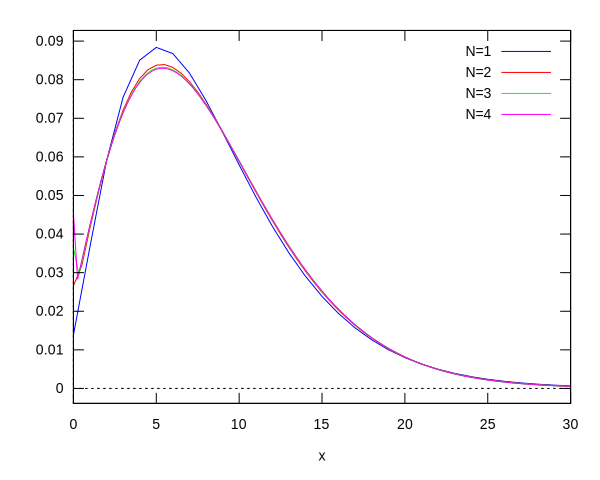

(%o6)             [/tmp/maxout241.gnuplot, /tmp/maxplot.svg]

In [6]:
plot2d([[discrete, renoprob(30, 1, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(60, 2, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(90, 3, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(120, 4, 1.0, 3, 1.0, 1.0)]],
    [legend, "N=1", "N=2", "N=3", "N=4"],
    [xlabel, "x"]);

Check that it is normalized and extract fixation probability.

In [7]:
genfunc(0, t, n0, kb, kd);
factor(genfunc(0, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));
genfunc(1, t, n0, kb, kd);

                                 (kd - kb) t
                            kd %e            - kd n0
(%o7)                      (---------------------)
                                 (kd - kb) t
                            kd %e            - kb

                                         s tau
                          (s - 2 D N) (%e      - 1)    N x0
(%o8)               (- -------------------------------)
                                     s tau
                       (s + 2 D N) %e      + s - 2 D N

(%o9)                                  1

# Functions to compute moments

In [8]:
numop(n, gf) := 
    if n=0 then gf
        else numop(n-1, z * diff(gf, z))$
mom(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, genfunc(z, t, n0, kb, kd))))$
momren(m, t, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                mom(m, t, n0, kb, kd) / N^m))$
cumu(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, 
            log(genfunc(z, t, n0, kb, kd)))))$
cumuren(m, zt, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                cumu(m, t, n0, kb, kd) / N^m))$

# Compute cumulants

In [10]:
cumu(1, t, n0, kb, kd);
cumu(2, t, n0, kb, kd);
cumu(3, t, n0, kb, kd);
cumu(4, t, n0, kb, kd);

                                    kb t - kd t
(%o19)                         n0 %e

                                kd t     kb t    kb t - 2 kd t
                (kd + kb) n0 (%e     - %e    ) %e
(%o20)          ----------------------------------------------
                                   kd - kb

              kd t     kb t     2   kd t             kd t     2   kd t
(%o21) (n0 (%e     - %e    ) (kd  %e     + 4 kb kd %e     + kb  %e
          2   kb t             kb t       2   kb t    kb t - 3 kd t           2
    - 2 kd  %e     - 2 kb kd %e     - 2 kb  %e    ) %e             )/(kd - kb)

                        kd t     kb t    kb t - 4 kd t
(%o22) ((kd + kb) n0 (%e     - %e    ) %e
         2   kd t + kb t               kd t + kb t       2   kd t + kb t
 ((- 6 kd  %e           ) - 12 kb kd %e            - 6 kb  %e
     2   2 kd t              2 kd t     2   2 kd t       2   2 kb t
 + kd  %e       + 10 kb kd %e       + kb  %e       + 6 kd  %e
       2   2 kb t            3
 + 6 kb  %e      ))/(kd - kb)

Reparameterize cumulants and collect powers of $N$.

In [11]:
cumuren(1, t, n0, kb, kd);
cumuren(2, t, n0, kb, kd);

                                    s tau
(%o23)                            %e      x0

                                s tau        s tau
                         2 D (%e      - 1) %e      x0
(%o24)                   ----------------------------
                                      s

In [12]:
block([mo],
    mo : expand(cumuren(3, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);
block([mo],
    mo : expand(cumuren(4, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);

          s tau        s tau    s tau              2    s tau     2   s tau
       (%e      - 1) %e      (%e      + 1) x0   6 D  (%e      - 1)  %e      x0
(%o25) -------------------------------------- + ------------------------------
                           2                                   2
                        2 N                                   s

              s tau        s tau      2 s tau
       2 D (%e      - 1) %e      (3 %e        - 2) x0
(%o26) ----------------------------------------------
                             2
                            N  s
                                                    3    s tau     3   s tau
                                                24 D  (%e      - 1)  %e      x0
                                              + -------------------------------
                                                               3
                                                              s

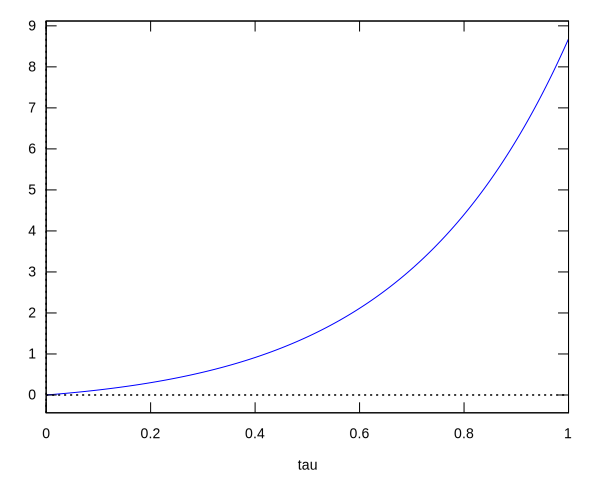

(%o27)            [/tmp/maxout201.gnuplot, /tmp/maxplot.svg]

In [13]:
plot2d(
    subst(1.0, s, 
        (%e^(s*tau)-1)*%e^(s*tau)*(%e^(s*tau)+1)/2),
[tau, 0, 1]);

# Appendix

## Original maxima code

```maxima
/* [wxMaxima batch file version 1] [ DO NOT EDIT BY HAND! ]*/
/* [ Created with wxMaxima version 18.02.0 ] */
/* [wxMaxima: comment start ]
Moment generating function.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
genfunc (x, t, n0, kb, kd) := 
    ((kd * %e^(- (kb - kd) * t) - kd + 
        (kd - kb * %e^(- (kb - kd) * t)) * x) / 
        (kd * %e^(- (kb - kd) * t) - kb + 
        (kb - kb * %e^(- (kb - kd) * t)) * x))^n0;
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Extract the probability distribution.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
probdist (m, t, n0, kb, kd) :=
block([gf],
    gf : genfunc(z, t, n0, kb, kd),
    makelist([j, subst (0, z, diff(gf, z, j) / (j!))],
        j, 0, m))$
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Reparameterize it according to diffusion approximation.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
factor(genfunc(z / N, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));
/* [wxMaxima: input   end   ] */


/* [wxMaxima: input   start ] */
renoprob (m, N, tau, x0, D, s) :=
    map (lambda ([pa], [pa[1] / N, pa[2] * N]),
    probdist (m, N * tau, N * x0, D + s/(2*N), D - s/(2*N)))$
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Plot with values tau = 1.0, x0 = 3.0, D = 1.0, s = 1.0
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
wxplot2d([[discrete, renoprob(30, 1, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(60, 2, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(90, 3, 1.0, 3, 1.0, 1.0)],
    [discrete, renoprob(120, 4, 1.0, 3, 1.0, 1.0)]],
    [legend, "N=1", "N=2", "N=3", "N=4"],
    [xlabel, "x"]);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Check that it is normalized and extract
fixation probability.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
genfunc(0, t, n0, kb, kd);
factor(genfunc(0, N * tau, N * x0, D + s/(2*N), D - s/(2*N)));
genfunc(1, t, n0, kb, kd);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Functions to compute moments.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
numop(n, gf) := 
    if n=0 then gf
        else numop(n-1, z * diff(gf, z))$
mom(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, genfunc(z, t, n0, kb, kd))))$
momren(m, t, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                mom(m, t, n0, kb, kd) / N^m))$
cumu(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, 
            log(genfunc(z, t, n0, kb, kd)))))$
cumuren(m, zt, n0, kb, kd) := 
                factor(psubst([t = N * tau, 
                        n0 = N * x0,
                        kb = D + s/(2*N), 
                        kd = D - s/(2*N)], 
                cumu(m, t, n0, kb, kd) / N^m))$
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Have a look at the cumulants.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
cumu(1, t, n0, kb, kd);
cumu(2, t, n0, kb, kd);
cumu(3, t, n0, kb, kd);
cumu(4, t, n0, kb, kd);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: comment start ]
Reparameterize the cumulants and collect 
powers of N.
   [wxMaxima: comment end   ] */


/* [wxMaxima: input   start ] */
cumuren(1, t, n0, kb, kd);
cumuren(2, t, n0, kb, kd);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: input   start ] */
block([mo],
    mo : expand(cumuren(3, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);
block([mo],
    mo : expand(cumuren(4, t, n0, kb, kd)),
    factor(coeff (mo, N, 0)) +
    factor(coeff (mo, N, -2)) / N^2);
/* [wxMaxima: input   end   ] */


/* [wxMaxima: input   start ] */
wxplot2d(
    subst(1.0, s, 
        (%e^(s*tau)-1)*%e^(s*tau)*(%e^(s*tau)+1)/2),
[tau, 0, 1]);
/* [wxMaxima: input   end   ] */

"Created with wxMaxima 18.02.0"$
```

```maxima

```